In [122]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [123]:
pyplot.rcParams['font.family'] ='serif'
pyplot.rcParams['font.size'] = '16'

In [124]:
g =9.81
vt = 30.0
CD = 1.0/40
CL = 1.0

v0 =vt

theta0 = 0.0 # trajectory angle

x0 =0.0  #horizontal position

y0 = 1000.0 # vertical position



In [150]:
def rhs_phugoid(u,CL,CD,g,vt):
    v,theta,x,y =u
    rhs = numpy.array([-g * math.sin(theta) -CD/CL * g/vt**2 * v**2,
                        -g * math.cos(theta)/v+g/vt**2 * v, 
                        v* math.cos(theta),
                        v* math.sin(theta)])
    #print('for rhs_phugoid function =',u)
    
    return rhs

In [151]:
def euler_step(u,f,dt,*args):
    unew =u + dt * f(u, *args)
    #print('for euler final step unew=',len(unew))
    return unew

In [153]:
T = 1.0
dt = 0.1
N = int(T/dt) + 1
print('N=',N)
u = numpy.empty((N,4))     
u[0] = numpy.array([v0,theta0,x0,y0])
for n in range(N-1):
    print('n=',n)
    u[n+1] = euler_step(u[n],rhs_phugoid,dt,CL,CD,g,vt) 

N= 11
n= 0
n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9


In [154]:
x = u[:,2]
y = u[:,3]
print('x=',u[:,2])
print('y=',u[:,3])

x= [ 0.          3.          5.9975475   8.9926465  11.98530623 14.97554106
 17.96337051 20.94881916 23.93191659 26.91269728 29.89120055]
y= [1000.         1000.         1000.          999.9998398   999.99935973
  999.99840098  999.99680592  999.99441847  999.99108439  999.98665162
  999.9809706 ]


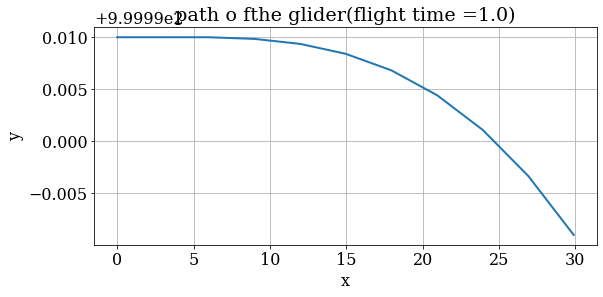

In [155]:
pyplot.figure(figsize=(9.0,4.0))
pyplot.title('path o fthe glider(flight time ={})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x,y,color='C0',linestyle='-',linewidth=2)

In [158]:
dt_values= [0.1,0.05,0.01,0.005,0.001]
u_values= []

for dt in dt_values:
    N = int(T/dt) +1
    u =numpy.empty((N,4))
    u[0] = numpy.array([v0,theta0,x0,y0])
    print('for time step dt value (i)  =',dt)
    for n in range(N-1):
        u[n+1] = euler_step(u[n],rhs_phugoid,dt,CL,CD,g,vt)
        
    u_values.append(u) 
    
    #print('u_values=',u_values)

for time step dt value (i)  = 0.1
for time step dt value (i)  = 0.05
for time step dt value (i)  = 0.01
for time step dt value (i)  = 0.005
for time step dt value (i)  = 0.001


In [159]:
def l1_diff(u_coarse,u_fine,dt):
    N_coarse=len(u_coarse)
    print('number of coarse=',len(u_coarse))
    print('number of fine=',len(u_fine))
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine/N_coarse)
    print('ratio = ',ratio)
    diff = dt * numpy.sum(numpy.abs(u_coarse- u_fine[::ratio]))
    return diff

In [161]:
diff_values = []

for i,dt in enumerate(dt_values[:-1]):
    print('i is =',i)
    print('dt is =',dt)
    
    
    diff = l1_diff(u_values[i][:,2], u_values[-1][:,2],dt)
    diff_values.append(diff)
    print('diff',diff)

i is = 0
dt is = 0.1
number of coarse= 11
number of fine= 1001
ratio =  91
diff 1.4834166443483743
i is = 1
dt is = 0.05
number of coarse= 21
number of fine= 1001
ratio =  48
diff 0.6296154209047602
i is = 2
dt is = 0.01
number of coarse= 101
number of fine= 1001
ratio =  10
diff 0.000522762483001773
i is = 3
dt is = 0.005
number of coarse= 201
number of fine= 1001
ratio =  5
diff 0.0002310929055641596


(0.004304458296658671,
 0.11615863496415421,
 0.00014907773521254607,
 2.29951885179868)

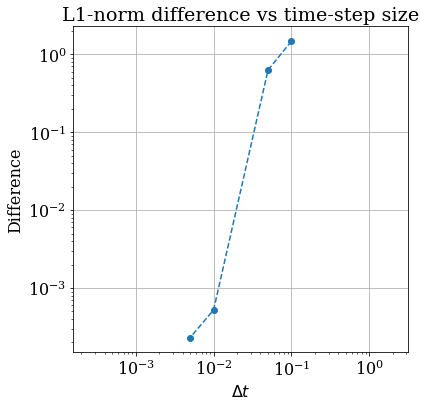

In [170]:
pyplot.figure(figsize=(6.0,6.0))
pyplot.title('L1-norm difference vs time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1],diff_values,color='C0',linestyle='--',marker='o')
pyplot.axis('equal')